<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/DL_8_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C_(Backpropagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 

- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} 
  $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
  &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
  &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\ 
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\ 
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [93]:
class Mul():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dresult):
    dx = dresult * self.y
    dy = dresult * self.x
    return dx, dy


In [94]:
class Add():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x + y
    return result

  def backward(self, dresult):
    dx = dresult * 1
    dy = dresult * 1
    return dx, dy   

In [95]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [96]:
x_result = x.forward(a,b)
y_result = y.forward(b,c)

print(x_result)
print(y_result)
print(f.forward(x_result, y_result))

2
7
14


In [97]:
dresult = 1

dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add_2)
print(dc_add)

7 2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식 
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [98]:
class Sigmoid:

  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1+np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx  

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [99]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x < 0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [100]:
import numpy as np

X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [101]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [102]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
Y = np.dot(X, W)

print("X\n{}".format(X))
print("W\n{}".format(W))
print("Y\n{}".format(Y))

X
[0.71189763 0.38786452]
W
[[0.90921144 0.22150579 0.93915124]
 [0.74819035 0.43396279 0.75663571]]
Y
[0.93746196 0.32600822 0.96205169]


In [103]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1,1), dL_dY.reshape(1,-1))

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))

dL_dY
[ 0.13008061 -0.9726333   0.04003508]
dL_dX
[-0.05957413 -0.29446963]
dL_dW
[[ 0.09260408 -0.69241534  0.02850088]
 [ 0.05045365 -0.37724995  0.01552819]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [104]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)
Y = np.dot(X, W) + B

print(Y)

[ 2.34044432 -0.46980422  1.39126876]


In [105]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1,1), dL_dY.reshape(1,-1))
dL_dB = dL_dY

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[-0.4246633  -0.32995783 -1.14123216]
dL_dX
[1.13620089 0.90566437]
dL_dW
[[0.77613183 0.60304429 2.08576208]
 [0.55358864 0.43013114 1.4877037 ]]
dL_dB
[-0.4246633  -0.32995783 -1.14123216]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [106]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [107]:
print("X\n{}".format(X))
print("W\n{}".format(W))
print("B\n{}".format(B))

X
[[0.52371787 0.88325984 0.69052714]
 [0.35798982 0.38513009 0.46739844]
 [0.61569604 0.16898399 0.5499617 ]
 [0.52242157 0.00428811 0.31152073]]
W
[[0.17970064 0.80093866]
 [0.61686177 0.75449568]
 [0.38754359 0.03342723]]
B
[0.74065773 0.08997679]


In [108]:
Y = np.dot(X,W) + B
print("Y\n{}".format(Y))
print("Y.shape:", Y.shape)


Y
[[1.64722877 1.19894083]
 [1.22369803 0.68290751]
 [1.1686726  0.72899295]
 [0.95791025 0.52205306]]
Y.shape: (4, 2)


In [109]:
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[[-0.1065564   0.1521406 ]
 [-0.43281712 -0.52430942]
 [-1.50574561 -0.48805656]
 [-0.03373437 -1.35710427]]
dL_dX
[[ 0.10270704  0.04905886 -0.03620961]
 [-0.4977172  -0.66257753 -0.18526171]
 [-0.66148682 -1.29707348 -0.59985643]
 [-1.09301937 -1.04473876 -0.05843777]]
dL_dW
[[-1.15545479 -1.11749372]
 [-0.51539945 -0.15584081]
 [-1.1144895  -0.83118272]]
dL_dB
[-2.0788535  -2.21732966]


In [110]:
class Layer():
  def __init__(self):
    self.W = np.random.randn(3,2)
    self.b = np.random.randn(2)
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)
    return dx


In [111]:
np.random.seed(111)

layer = Layer()

In [112]:
X = np.random.rand(2,3)
Y = layer.forward(X)

print(X)

[[0.23868214 0.33765619 0.99071246]
 [0.23772645 0.08119266 0.66960024]]


In [113]:
dout = np.random.rand(2,2)
dout_dx = layer.backward(dout)

print(dout_dx)

[[-0.59898814  0.83225859 -0.61525238]
 [-0.48312871  0.65565961 -0.42154775]]


### MNIST 분류 with 역전파


#### Modules Import

In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from collections import OrderedDict

### collections
* namedtuple() : 이름 붙은 필드를 갖는 튜플 서브 클래스를 만들기 위한 팩토리 함수
```
Point = namedtuple('Point', ['x', 'y'])
p = Point(11, y=22)     
p[0] + p[1]             
>>> 33
x, y = p                
x, y
>>> (11, 22)
p.x + p.y               
>>> 33
p                       
>>> Point(x=11, y=22)
```

* deque : 양쪽 끝에서 빠르게 추가와 삭제를 할 수 있는 리스트류 컨테이너
```
   d = deque('ghi')                 
   for elem in d:                   
    print(elem.upper())
    >>> G
    >>> H
    >>> I
```

* ChainMap : 여러 매핑의 단일 뷰를 만드는 딕셔너리류 클래스
```
  baseline = {'music': 'bach', 'art': 'rembrandt'}
  adjustments = {'art': 'van gogh', 'opera': 'carmen'}
    list(ChainMap(adjustments, baseline))
  >>> ['music', 'art', 'opera']
```

* Counter : 해시 가능한 객체를 세는 데 사용하는 딕셔너리 서브 클래스
```
  cnt = Counter()
  for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    cnt[word] += 1
  cnt
  >>> Counter({'blue': 3, 'red': 2, 'green': 1})
```

* OrderedDict : 항목이 추가된 순서를 기억하는 딕셔너리 서브 클래스
```
d = OrderedDict.fromkeys('abcde')
d.move_to_end('b')
''.join(d)
>>> 'acdeb'
d.move_to_end('b', last=False)
''.join(d)
>>> 'bacde'
```

* defaultdict : 누락된 값을 제공하기 위해 팩토리 함수를 호출하는 딕셔너리 서브 클래스
```
  s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
  d = defaultdict(list)
  for k, v in s:
    d[k].append(v)
  sorted(d.items())
>>>[('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]
```

* UserDict :더 쉬운 딕셔너리 서브 클래싱을 위해 딕셔너리 객체를 감싸는 래퍼
* UserList : 더 쉬운 리스트 서브 클래싱을 위해 리스트 객체를 감싸는 래퍼
* UserString : 더 쉬운 문자열 서브 클래싱을 위해 문자열 객체를 감싸는 래퍼

#### 데이터 로드

In [115]:
np.random.seed(42)
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

#### 데이터 전처리

In [116]:
X_train, X_test = X_train.reshape(-1, 28 * 28).astype(np.float32), X_test.reshape(-1, 28 * 28).astype(np.float32)

X_train /= .255
X_test /= .255

#eye 1 대각행렬
y_train = np.eye(num_classes)[y_train]
#y_train =  tf.one_hot(y_train, depth =10).numpy()
#print(y_train)

In [117]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


#### Hyper Parameters

In [118]:
epochs = 1000
lr = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions

In [131]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis=1)

  batch_size = pred_y.shape[0]

  delta = 1e-7
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + delta)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(x)
  return cross_entropy_error(pred_y, true_y)

#### Util Classes

##### ReLU

In [120]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x < 0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

##### Sigmoid

In [121]:
class Sigmoid:

  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1+np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx  

##### Layer

In [122]:
class Layer():
  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None
    self.origin_x_shape = None

    self.dL_dW = None
    self.dL_db = None

  def forward(self, x):
    self.origin_x_shape = x.shape

    x = x.reshape(x.shape[0], -1)
    self.x = x

    out = np.dot(self.x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dL_dW = np.dot(self.x.T, dout)
    self.dL_db = np.sum(dout, axis = 0)
    dx = dx.reshape(*self.origin_x_shape)
    return dx


#### Softmax

In [123]:
class Softmax():

  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]

    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

In [142]:
class MyModel():

  def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.params = {}

    self.__init_weights(activation)

    activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
    
    self.layers = OrderedDict()
    for idx in range(1, self.hidden_layer_num + 1):
      self.layers['Layer' + str(idx)] = Layer(self.params['W'+ str(idx)], self.params['b'+ str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
      #print(self.layers.popitem(idx))

    idx = self.hidden_layer_num + 1

    self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])
    #print(self.layers.popitem(idx))

    self.last_layer = Softmax()

  def __init_weights(self, activation):
    weight_std = None
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
    for idx in range(1, len(all_size_list)):
      if activation.lower() == "relu":
        weight_std = np.sqrt(2.0 / self.input_size)
      elif activation.lower() == "sigmoid":
        weight_std = np.sqrt(1.0 / self.input_size)

      self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx-1], all_size_list[idx])
      self.params['b' + str(idx)] = np.random.randn(all_size_list[idx])
    
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return self.last_layer.forward(pred_y, true_y)

  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    pred_y = np.argmax(pred_y, axis =1)

    if true_y.ndim != 1:
      true_y = np.argmax(true_y, axis =1)

    accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
    return accuracy

  def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    for idx in range(1, self.hidden_layer_num + 2):
      grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
      grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

    return grads


#### 모델 생성 및 학습

In [143]:
model = MyModel(28 * 28, [100,64,32], 10, activation='relu')

('Activation_function1', <__main__.ReLU object at 0x7ff24592b950>)
('Activation_function2', <__main__.ReLU object at 0x7ff24592bf10>)
('Activation_function3', <__main__.ReLU object at 0x7ff24592b210>)
('Layer4', <__main__.Layer object at 0x7ff24592b210>)


In [126]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [132]:
for epoch in range(epochs):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = X_train[batch_mask]
  y_batch = y_train[batch_mask]

  grad = model.gradient(x_batch, y_batch)

  for key in model.params.keys():
    model.params[key] -= lr * grad[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  if epoch % 50 == 0 :
    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("Epch:{}, Train Acc{}, Test Acc{}".format(epoch+1, train_acc, test_acc))

Epch:1, Train Acc0.12225, Test Acc0.137
Epch:51, Train Acc0.6212333333333333, Test Acc0.6303
Epch:101, Train Acc0.7068166666666666, Test Acc0.7192
Epch:151, Train Acc0.7531833333333333, Test Acc0.7678
Epch:201, Train Acc0.7761666666666667, Test Acc0.7859
Epch:251, Train Acc0.7995, Test Acc0.8067
Epch:301, Train Acc0.8070666666666667, Test Acc0.8136
Epch:351, Train Acc0.8303833333333334, Test Acc0.8366
Epch:401, Train Acc0.8390333333333333, Test Acc0.8436
Epch:451, Train Acc0.8440333333333333, Test Acc0.846
Epch:501, Train Acc0.84995, Test Acc0.8522
Epch:551, Train Acc0.8600333333333333, Test Acc0.8581
Epch:601, Train Acc0.8633166666666666, Test Acc0.8658
Epch:651, Train Acc0.86775, Test Acc0.8659
Epch:701, Train Acc0.8722666666666666, Test Acc0.8736
Epch:751, Train Acc0.8804166666666666, Test Acc0.8779
Epch:801, Train Acc0.8803833333333333, Test Acc0.88
Epch:851, Train Acc0.8847833333333334, Test Acc0.8856
Epch:901, Train Acc0.8841166666666667, Test Acc0.8869
Epch:951, Train Acc0.8898,

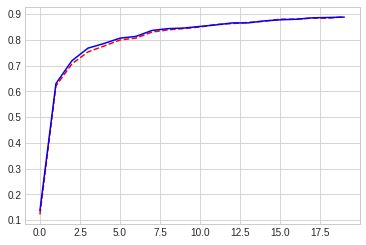

In [133]:
plt.plot(np.arange(1000//50), train_acc_list, 'r--', label='train_acc')
plt.plot(np.arange(1000//50), test_acc_list, 'b', label='test_acc')

plt.show()

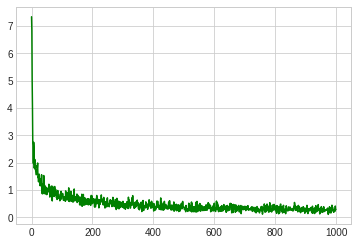

In [134]:
plt.plot(np.arange(1000), train_loss_list, 'green', label = 'train_loss')
plt.show()